In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import scipy
plt.close('all')
from matplotlib import rcParams, cycler

## Creating input for the numerical method

In [2]:
DATA_PATH = "data/fertility_indicators.csv"

# Import data

file = pd.read_csv(DATA_PATH)
data = pd.DataFrame(file, columns= ['Variant', 'Location', 'MidPeriod', 'AgeGrpStart', 'ASFR'])
data[['MidPeriod', 'AgeGrpStart', 'ASFR']] = data[['MidPeriod', 'AgeGrpStart', 'ASFR']].apply(pd.to_numeric)
data[['MidPeriod']] = data[['MidPeriod']].subtract(3) #MidPeriod -> Start of the period
data.columns = ['Variant', 'Location', 'Time', 'AgeGrpStart', 'ASFR'] #rename column 'MidPeriod' -> 'Time'

In [3]:
data_loc = data.loc[data['Location'] == 'Switzerland']
data_loc = data_loc.loc[data_loc['Variant'] == 'Medium']
data_loc = data_loc.loc[data_loc['Time'] <= 2020]

/home/louise/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Text(0.5, 1.0, 'Switzerland')

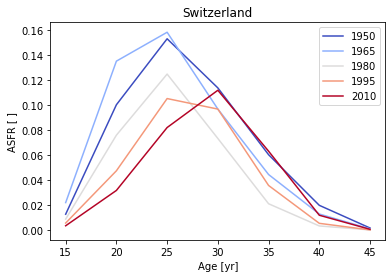

In [4]:
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates)/3)))

for i in range (0,len(dates)):
    if (0 == np.mod(i,3)):
        data_loc_i = data_loc.loc[data_loc['Time'] == dates[i]]
        y = data_loc_i['ASFR']/1000
        x = data_loc_i['AgeGrpStart']
        plt.plot(x, y, label=dates[i])
    
plt.xlabel('Age [yr]')
plt.ylabel('ASFR [ ]')
plt.legend(loc ='upper right')
plt.title('Switzerland')

In [5]:
fig.savefig('ASFR_CH.png', dpi=100, bbox_inches = "tight")

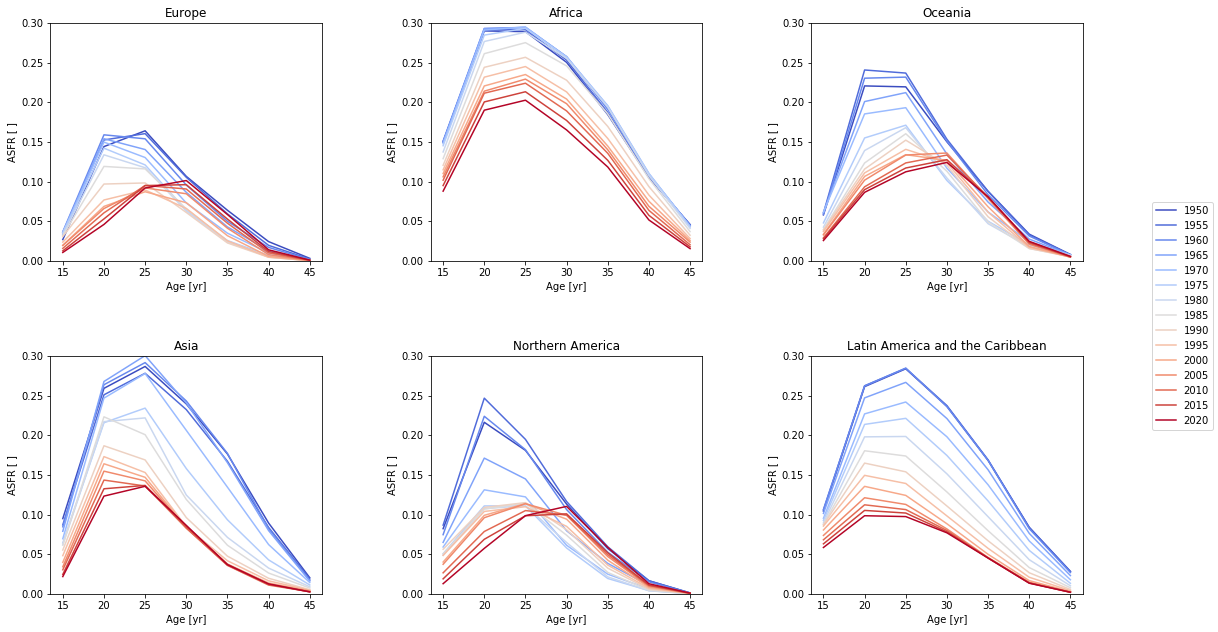

In [7]:
# Plot of all regions

regions = ['Europe', 'Africa', 'Oceania', 'Asia', 'Northern America', 'Latin America and the Caribbean'];
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates))))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_size_inches(18.5, 10.5)

for k in range(1, 7):
    ax = fig.add_subplot(2, 3, k)
    ax.set(title=regions[k-1], xlabel='Age [yr]', ylabel='ASFR [ ]', ylim=[0, 0.3])
    data_spec = data.loc[data['Location'] == regions[k-1]]
    data_spec = data_spec.loc[data_spec['Variant'] == 'Medium']
    data_spec = data_spec.loc[data_spec['Time'] <= 2020]
    for i in range (0,len(dates)):
        #if (0 == np.mod(i,3)):
            data_spec_i = data_spec.loc[data_spec['Time'] == dates[i]]
            y = data_spec_i['ASFR']/1000
            x = data_spec_i['AgeGrpStart']
            ax.plot(x, y, label=dates[i])
            
fig.legend(labels=dates, loc="center right")

## Fitting ASFR as a function of age

In [9]:
# Function computing the sum of 2 Gaussian
def Gaussian2(x, *args):
    m1, m2, s1, s2, k1, k2 = args
    ret = k1 * exp(-(x-m1)**2 / s1)
    ret += k2 * exp(-(x-m2)**2 / s2)
    return ret

In [12]:
# Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

In [26]:
# fit with a simple Gaussian 

x_nodes = np.linspace(15,45,50)
data_loc_i = data_loc.loc[data_loc['Time'] == dates[1]]
y = np.asarray(data_loc_i['ASFR'], dtype=float)
x = np.asarray(data_loc_i['AgeGrpStart'], dtype=float)

init_vals = [25, 25, 60, 60, 140, 160]  # for [amp, cen, wid]

best_vals, = curve_fit(Gaussian2, x, y, p0=init_vals)
print('best_vals: {}'.format(best_vals))

best_vals: [ 28.14708952  22.5001718   72.61988478  21.05033354 109.08313833
  92.25649335]


Text(0, 0.5, 'ASFR')

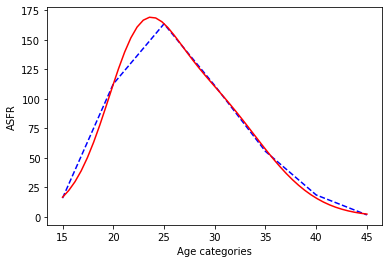

In [29]:
plt.figure();
plt.plot(x, y, 'b--', label='data')
plt.plot(x_nodes, Gaussian2(x_nodes, *best_vals), 'r-', label='fit')
plt.xlabel('Age categories')
plt.ylabel('ASFR')

## Creating input births

Text(0.5, 1.0, 'Philippines')

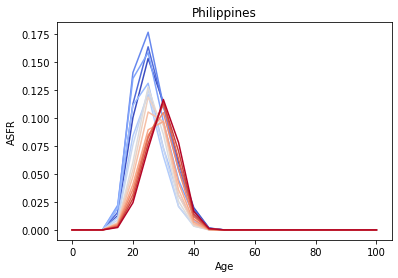

In [31]:
data_file = pd.DataFrame()
ages = np.linspace(0,100,21)
data_file['Age'] = ages
                   
plt.figure() 

for i in range (0,len(dates)):
    data_loc_i = data_loc.loc[data_loc['Time'] == dates[i]]
    y = np.pad(data_loc_i['ASFR'], (3, 11), 'constant', constant_values=(0, 0))
    y /= 1000
    data_file[str(dates[i])] = y
    plt.plot(ages, y)
    
plt.xlabel('Age')
plt.ylabel('ASFR')
plt.title('Philippines')

In [30]:
data_file.to_csv("ASFR_PH.csv", index=False)